<a href="https://colab.research.google.com/github/HEM9490/YBIinternship/blob/main/FASHION_MNIST_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST Data Classification Project

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras


In [ ]:
(X_train, y_train), (X_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Print the shape of data
X_train.shape,y_train.shape, "***************" , X_test.shape,y_test.shape

((60000, 28, 28), (60000,), '***************', (10000, 28, 28), (10000,))

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train[0]

9

In [ ]:
class_labels = [	"T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt",	"Sneaker",	"Bag", "Ankle boot"]

In [ ]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

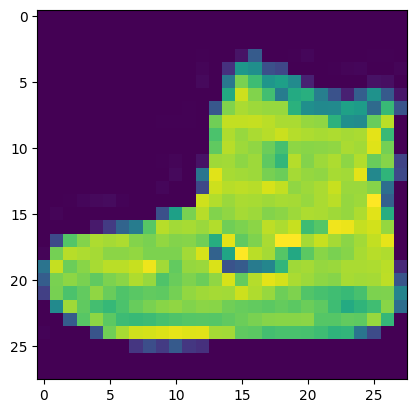

In [ ]:
# show image
plt.imshow(X_train[0])


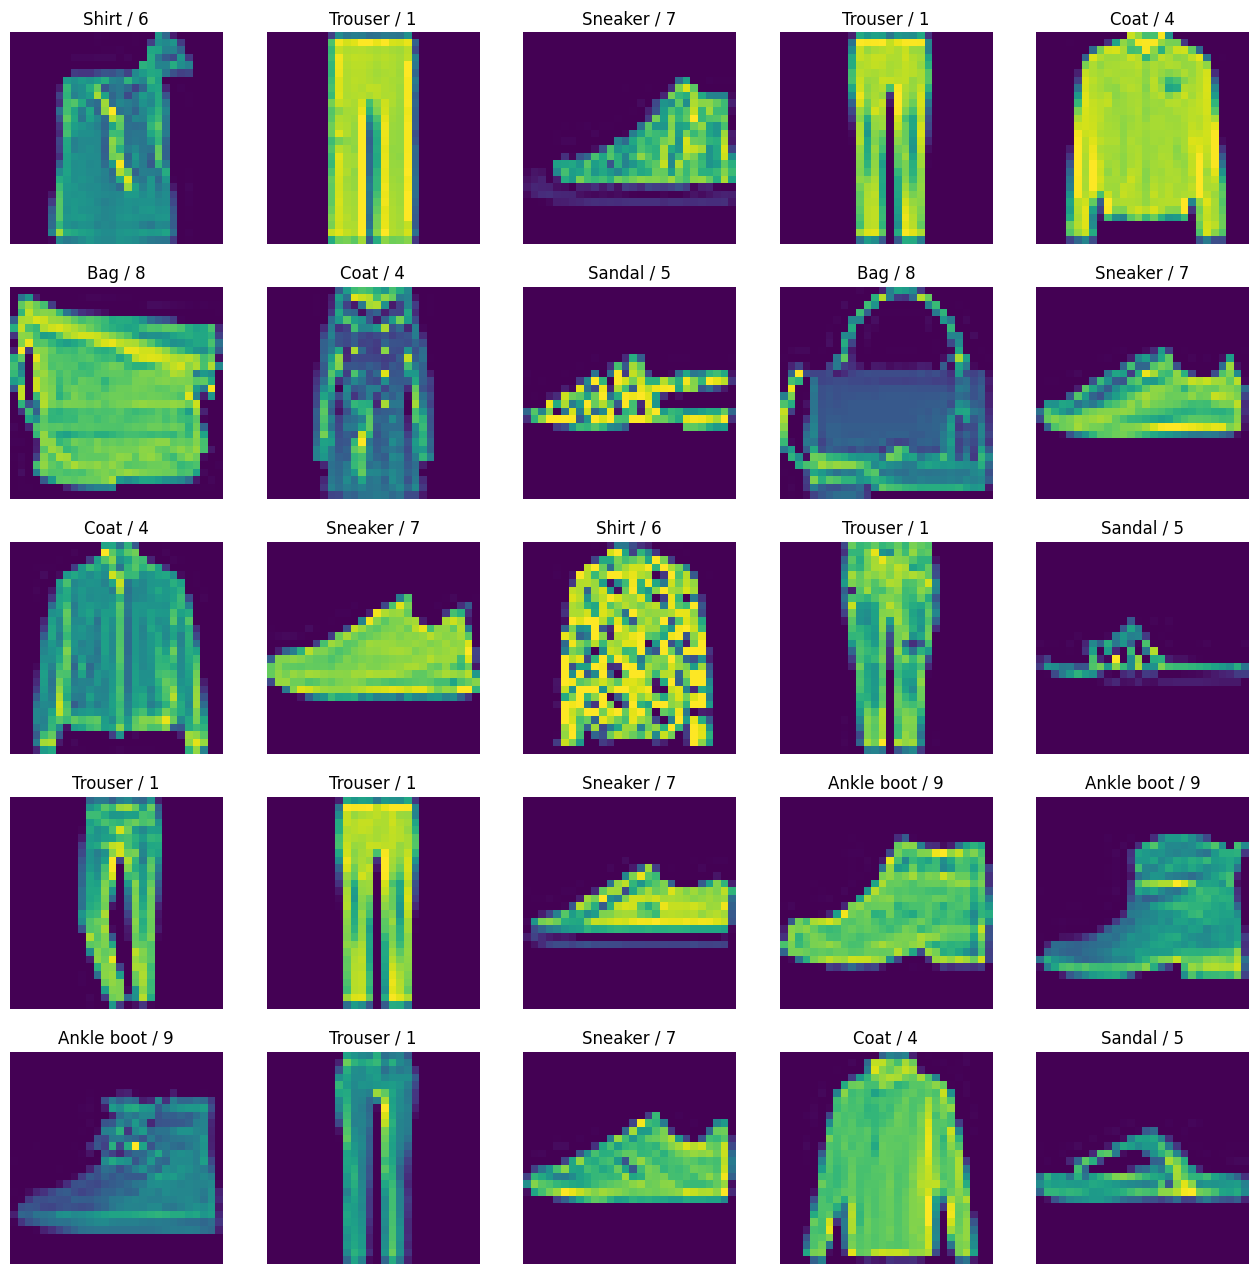

In [ ]:
plt.figure(figsize=(16,16))

j=1
for  i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(X_train[i])
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [ ]:
X_train.ndim

3

In [ ]:
X_train = np.expand_dims(X_train,-1)

In [ ]:
X_train.ndim

4

In [ ]:
X_test=np.expand_dims(X_test,-1)

In [ ]:
# feature scaling
X_train = X_train/255
X_test= X_test/255

In [ ]:
# Split dataset
from sklearn.model_selection import  train_test_split
X_train,X_Validation,y_train,y_Validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [ ]:
X_train.shape,X_Validation.shape,y_train.shape,y_Validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

#Buiding the CNN model

In [ ]:
model=keras.models.Sequential([
                         keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dense(units=10,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))

Epoch 1/10
94/94 [==============================] - 27s 276ms/step - loss: 0.6337 - accuracy: 0.7872 - val_loss: 0.4159 - val_accuracy: 0.8608
Epoch 2/10
94/94 [==============================] - 29s 311ms/step - loss: 0.3856 - accuracy: 0.8650 - val_loss: 0.3647 - val_accuracy: 0.8733
Epoch 3/10
94/94 [==============================] - 26s 281ms/step - loss: 0.3327 - accuracy: 0.8840 - val_loss: 0.3522 - val_accuracy: 0.8788
Epoch 4/10
94/94 [==============================] - 26s 274ms/step - loss: 0.3032 - accuracy: 0.8932 - val_loss: 0.3182 - val_accuracy: 0.8877
Epoch 5/10
94/94 [==============================] - 25s 270ms/step - loss: 0.2837 - accuracy: 0.9005 - val_loss: 0.3058 - val_accuracy: 0.8934
Epoch 6/10
94/94 [==============================] - 27s 286ms/step - loss: 0.2627 - accuracy: 0.9078 - val_loss: 0.2959 - val_accuracy: 0.8972
Epoch 7/10
94/94 [==============================] - 28s 300ms/step - loss: 0.2510 - accuracy: 0.9102 - val_loss: 0.2884 - val_accuracy: 0.8996

In [ ]:
y_pred = model.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 2s 6ms/step


array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.98, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.17, 0.05, 0.01]], dtype=float32)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2835 - accuracy: 0.8963


[0.2835039496421814, 0.8963000178337097]

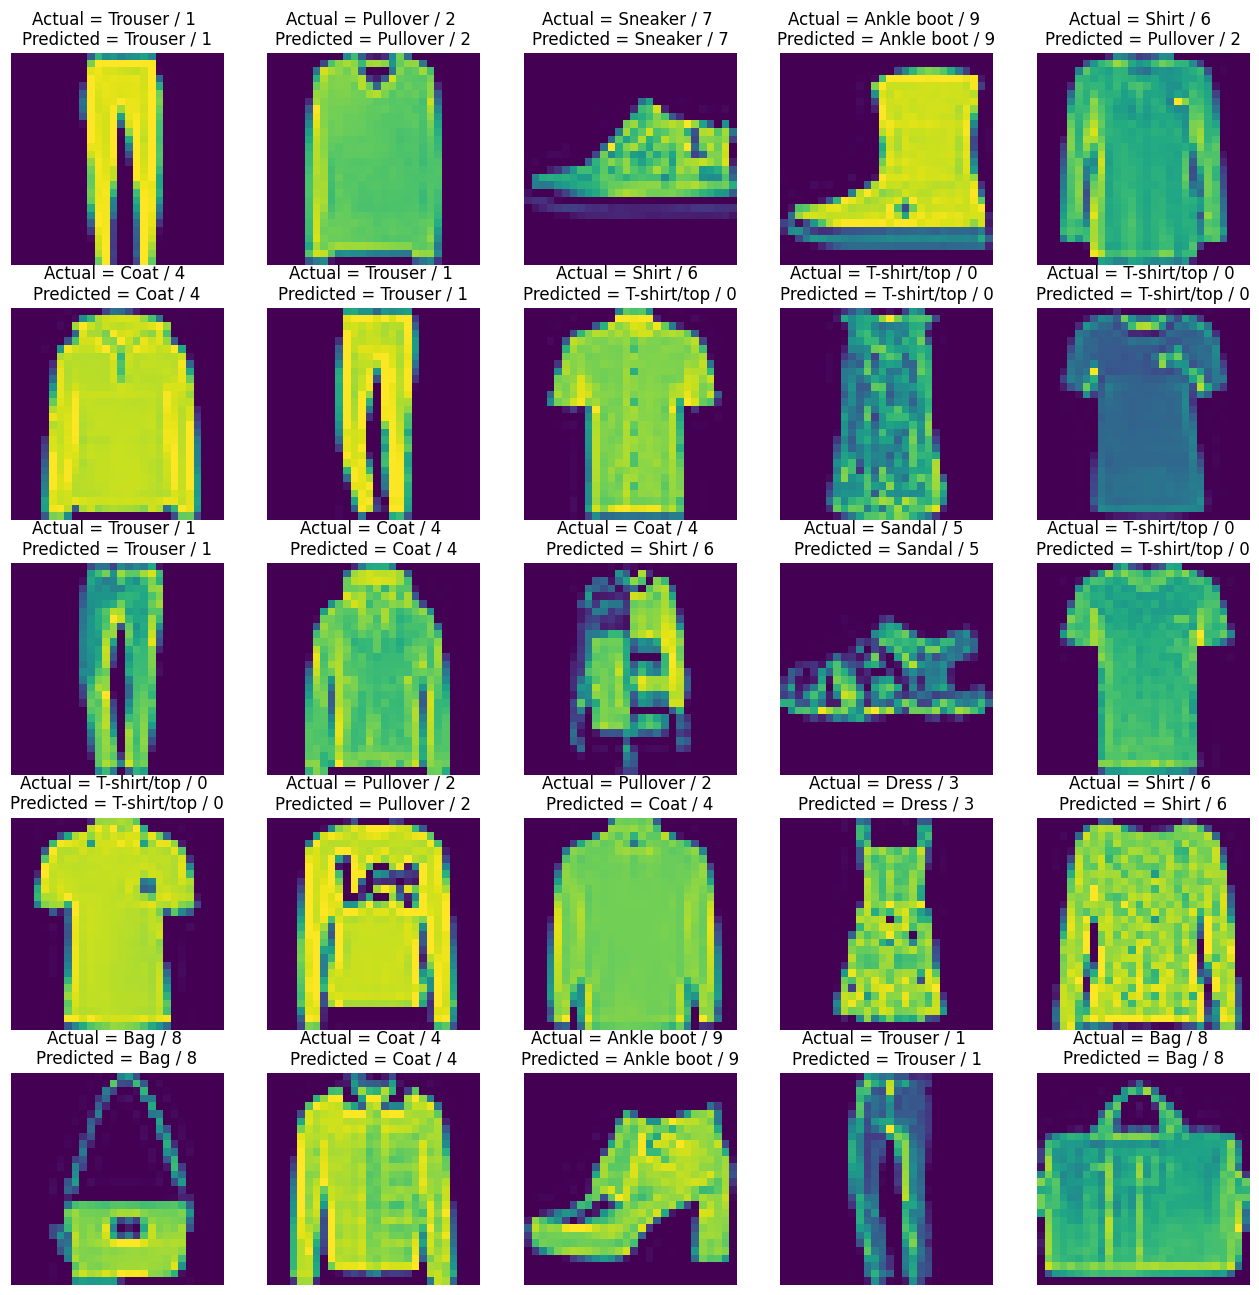

In [ ]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(X_test[i].reshape(28,28))
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')


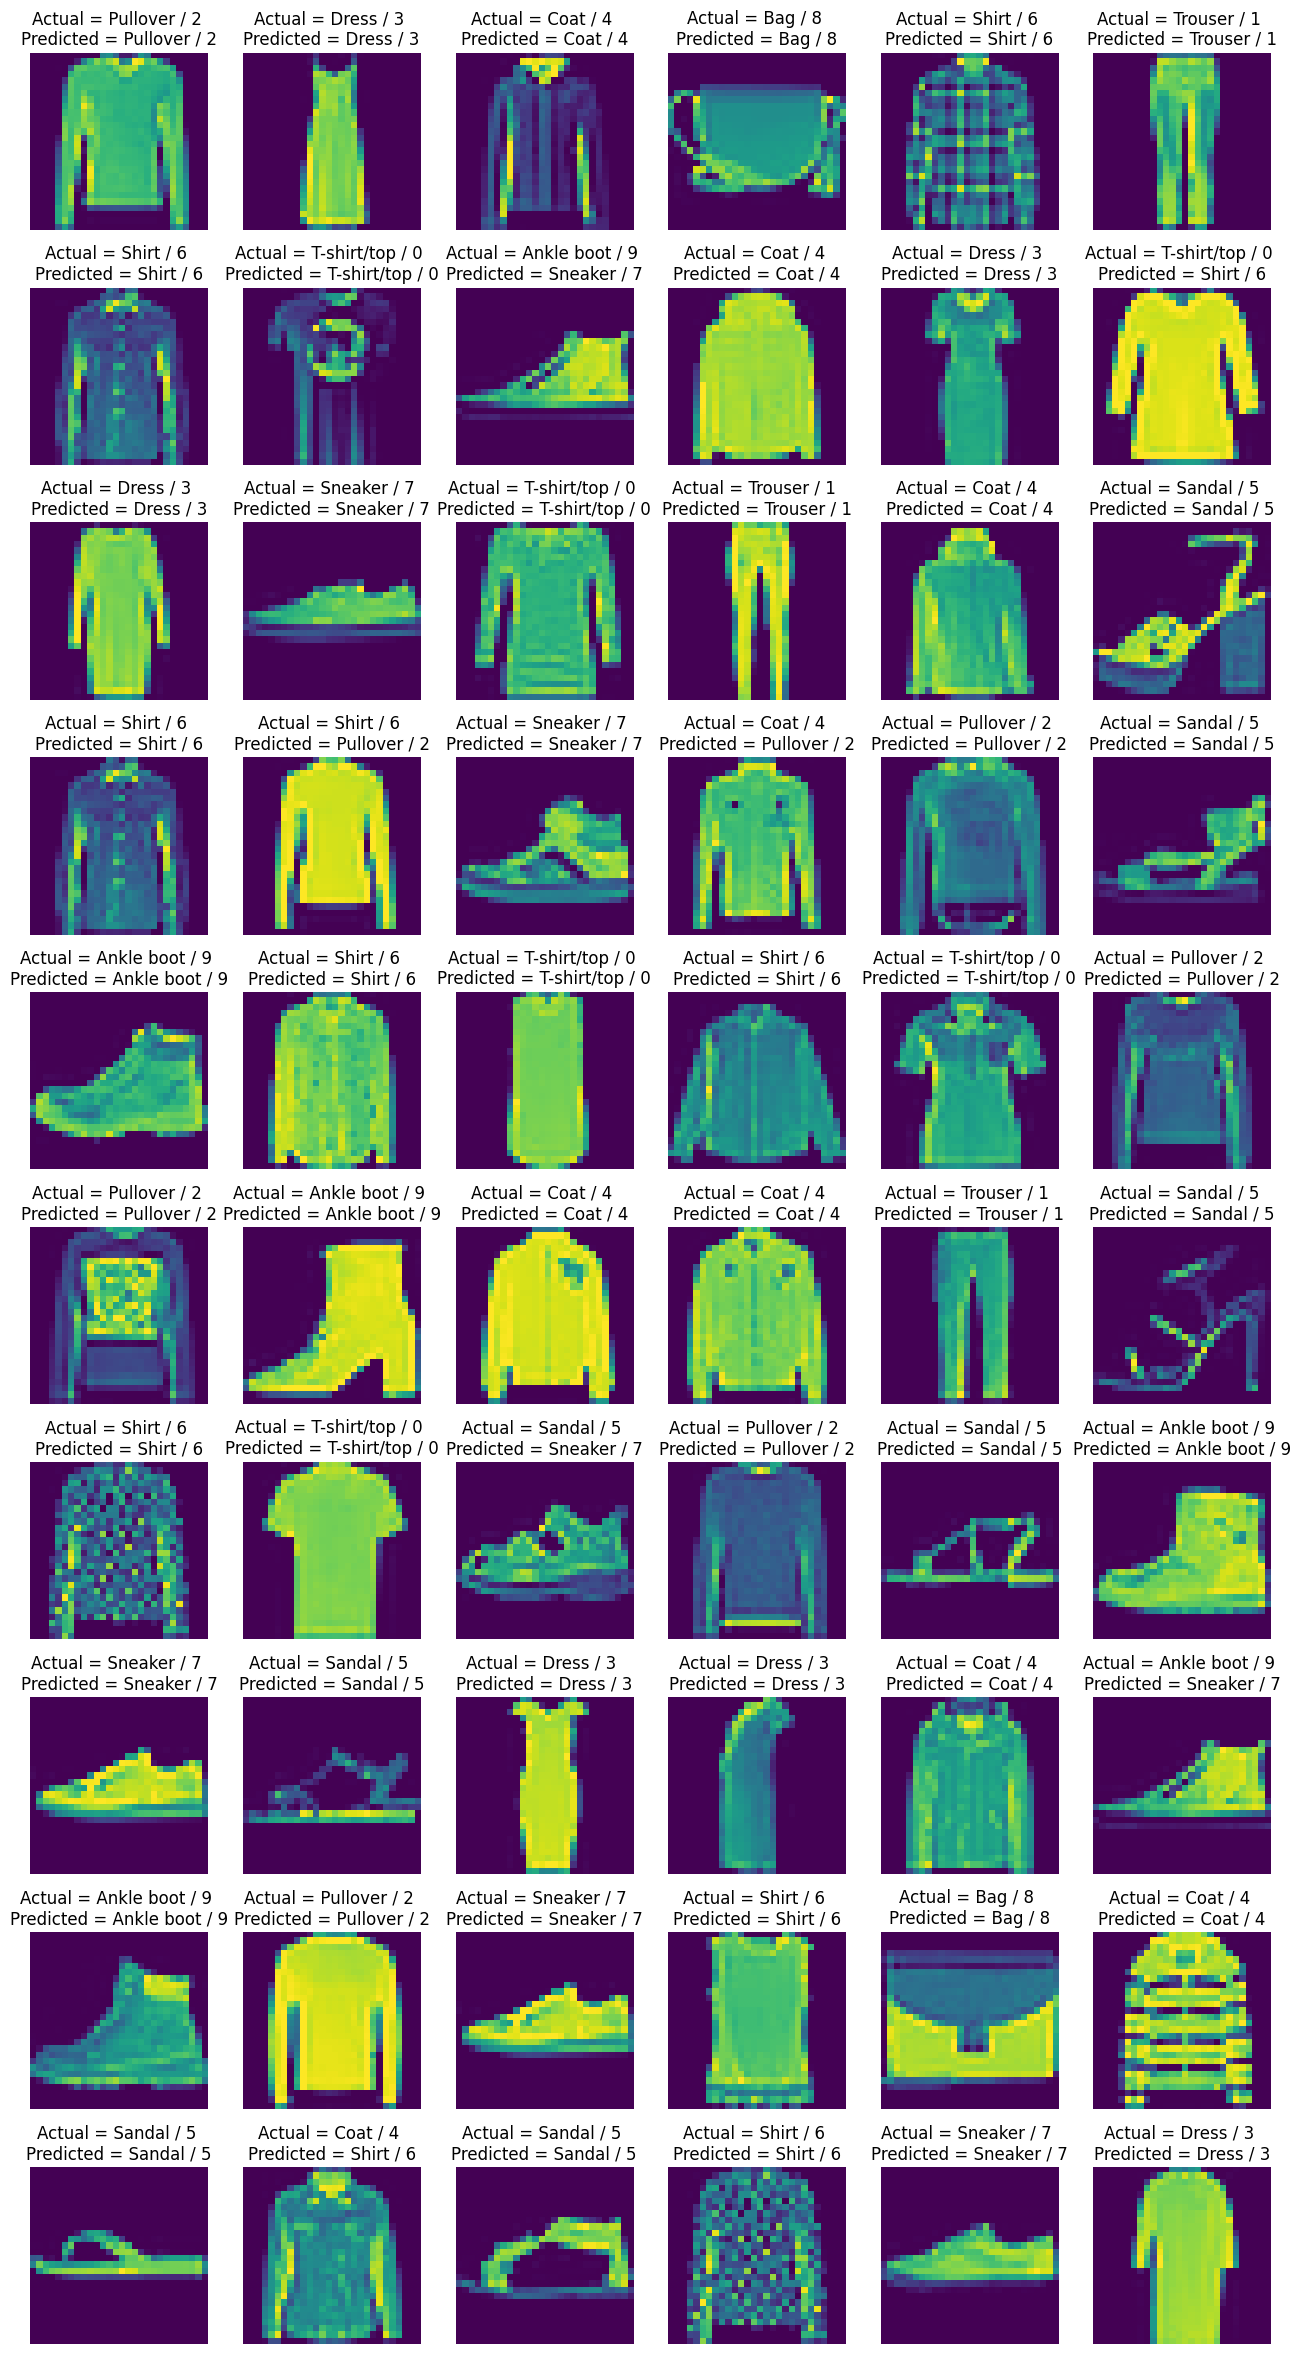

In [ ]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28))
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

<Figure size 1600x900 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.86      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.83      0.86      0.84      1000
       Dress       0.87      0.93      0.90      1000
        Coat       0.89      0.77      0.82      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.70      0.71      0.71      1000
     Sneaker       0.93      0.98      0.95      1000
         Bag       0.98      0.96      0.97      1000
  Ankle boot       0.98      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



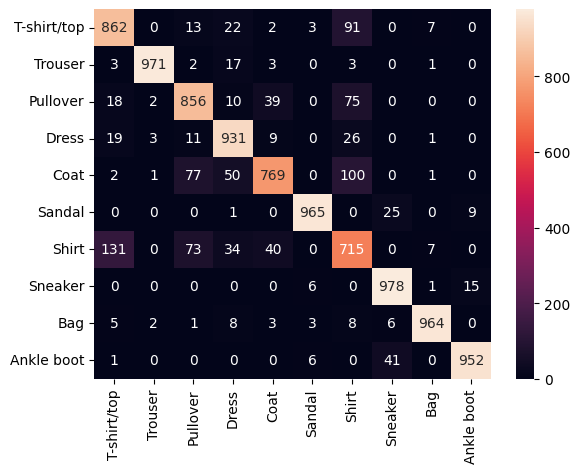

In [ ]:
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

In [ ]:
# Save Model

In [ ]:
model.save('fashion_mnist_cnn_model.h5')

#Build 2 complex CNN

In [ ]:
#Building CNN model
cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

# complie the model
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

#Train the Model
cnn_model2.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))

cnn_model2.save('fashion_mnist_cnn_model2.h5')

"""######## very complex model"""

#Building CNN model
cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

# complie the model
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

#Train the Model
cnn_model3.fit(X_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))

cnn_model3.save('fashion_mnist_cnn_model3.h5')

cnn_model3.evaluate(X_test, y_test)

Epoch 1/20
94/94 [==============================] - 75s 781ms/step - loss: 0.9865 - accuracy: 0.6292 - val_loss: 0.5506 - val_accuracy: 0.7822
Epoch 2/20
94/94 [==============================] - 34s 359ms/step - loss: 0.5227 - accuracy: 0.8024 - val_loss: 0.4457 - val_accuracy: 0.8380
Epoch 3/20
94/94 [==============================] - 32s 342ms/step - loss: 0.4379 - accuracy: 0.8415 - val_loss: 0.3976 - val_accuracy: 0.8502
Epoch 4/20
94/94 [==============================] - 36s 387ms/step - loss: 0.3895 - accuracy: 0.8564 - val_loss: 0.3570 - val_accuracy: 0.8669
Epoch 5/20
94/94 [==============================] - 33s 356ms/step - loss: 0.3568 - accuracy: 0.8689 - val_loss: 0.3464 - val_accuracy: 0.8672
Epoch 6/20
94/94 [==============================] - 32s 339ms/step - loss: 0.3277 - accuracy: 0.8803 - val_loss: 0.3198 - val_accuracy: 0.8808
Epoch 7/20
94/94 [==============================] - 35s 377ms/step - loss: 0.3132 - accuracy: 0.8844 - val_loss: 0.3218 - val_accuracy: 0.8794

[0.463547021150589, 0.9045000076293945]

In [ ]:
def model_arch():
	models = Sequential()

	# We are learning 64
	# filters with a kernel size of 5x5
	models.add(Conv2D(64, (5, 5),
					padding="same",
					activation="relu",
					input_shape=(28, 28, 1)))

	# Max pooling will reduce the
	# size with a kernel size of 2x2
	models.add(MaxPooling2D(pool_size=(2, 2)))
	models.add(Conv2D(128, (5, 5), padding="same",
					activation="relu"))

	models.add(MaxPooling2D(pool_size=(2, 2)))
	models.add(Conv2D(256, (5, 5), padding="same",
					activation="relu"))

	models.add(MaxPooling2D(pool_size=(2, 2)))

	# Once the convolutional and pooling
	# operations are done the layer
	# is flattened and fully connected layers
	# are added
	models.add(Flatten())
	models.add(Dense(256, activation="relu"))

	# Finally as there are total 10
	# classes to be added a FCC layer of
	# 10 is created with a softmax activation
	# function
	models.add(Dense(10, activation="softmax"))
	return models


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
model = model_arch()

model.compile(optimizer=Adam(learning_rate=1e-3),
			loss='sparse_categorical_crossentropy',
			metrics=['sparse_categorical_accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 128)       204928    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 256)         819456    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 256)       

In [ ]:
history = model.fit(
	X_train.astype(np.float32), y_train.astype(np.float32),
	epochs=10,
	steps_per_epoch=100,
	validation_split=0.33
)


Epoch 1/10
100/100 [==============================] - 616s 6s/step - loss: 0.2749 - sparse_categorical_accuracy: 0.9010 - val_loss: 0.2927 - val_sparse_categorical_accuracy: 0.8930
Epoch 2/10
100/100 [==============================] - 598s 6s/step - loss: 0.2400 - sparse_categorical_accuracy: 0.9129 - val_loss: 0.2729 - val_sparse_categorical_accuracy: 0.9018
Epoch 3/10
100/100 [==============================] - 594s 6s/step - loss: 0.2177 - sparse_categorical_accuracy: 0.9201 - val_loss: 0.2694 - val_sparse_categorical_accuracy: 0.9040
Epoch 4/10
100/100 [==============================] - 579s 6s/step - loss: 0.1874 - sparse_categorical_accuracy: 0.9307 - val_loss: 0.2919 - val_sparse_categorical_accuracy: 0.8947
Epoch 5/10
100/100 [==============================] - 592s 6s/step - loss: 0.1710 - sparse_categorical_accuracy: 0.9378 - val_loss: 0.2670 - val_sparse_categorical_accuracy: 0.9068
Epoch 6/10
100/100 [==============================] - 590s 6s/step - loss: 0.1535 - sparse_cate

In [ ]:
model.save_weights('./model.h5', overwrite=True)


In [ ]:
# Accuracy vs Epoch plot
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
